# mBuild Tutorial 05: Creating Flexible Classes

This tutorial demonstrates how to create flexible classes that can be used to examine families of `Compounds`.  In particular, the previous class to define butane is extended to allow construction of linear alkanes of arbitrary chain length.

As in the prior tutorials, we need to first import mbuild (here as `mb`), import the visualization routines (as `visualize`), and apply the matplotlib command to redirect plots to the notebook window.

In [14]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

If we had to create a new class for each molecule we wanted to examine this would still be quite cumbersome if we wanted to screen over a large structural parameter space. However, since each `Compound` is defined as a Python class, one simply needs to define one or more top-level variables as arguments so that a single class definition could be used to create a whole family of molecules. We'll demonstrate that here by modifying the Butane class, defined in the previous tutorial, to allow the creation of any linear alkane by adding a `chain_length` argument.

Note, rather than defining the CH2 and H classes again, we will use the classes for these that come as part of the mBuild library.  The classes defined in the prior tutorial are consitent with naming conventions used as part of the classes included with mBuild. 

In [15]:
from mbuild.lib.atoms import H
from mbuild.lib.moieties import CH2

class Alkane(mb.Compound):
    def __init__(self, chain_length):
        super(Alkane, self).__init__()
        
        hydrogen = H()
        last_unit = CH2()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['up'])
        self.add(last_unit, label='ch2[$]')
        self.add(hydrogen, label='up-cap')
        for _ in range(chain_length - 1):
            current_unit = CH2()
            mb.force_overlap(move_this=current_unit,
                             from_positions=current_unit['up'],
                             to_positions=last_unit['down'])
            self.add(current_unit, label='ch2[$]')
            last_unit=current_unit
        hydrogen = H()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['down'])
        self.add(hydrogen, label='down-cap')

We can now create any linear alkane by simply providing a different value for `chain_length` upon instantiation.

<IPython.core.display.Javascript object>


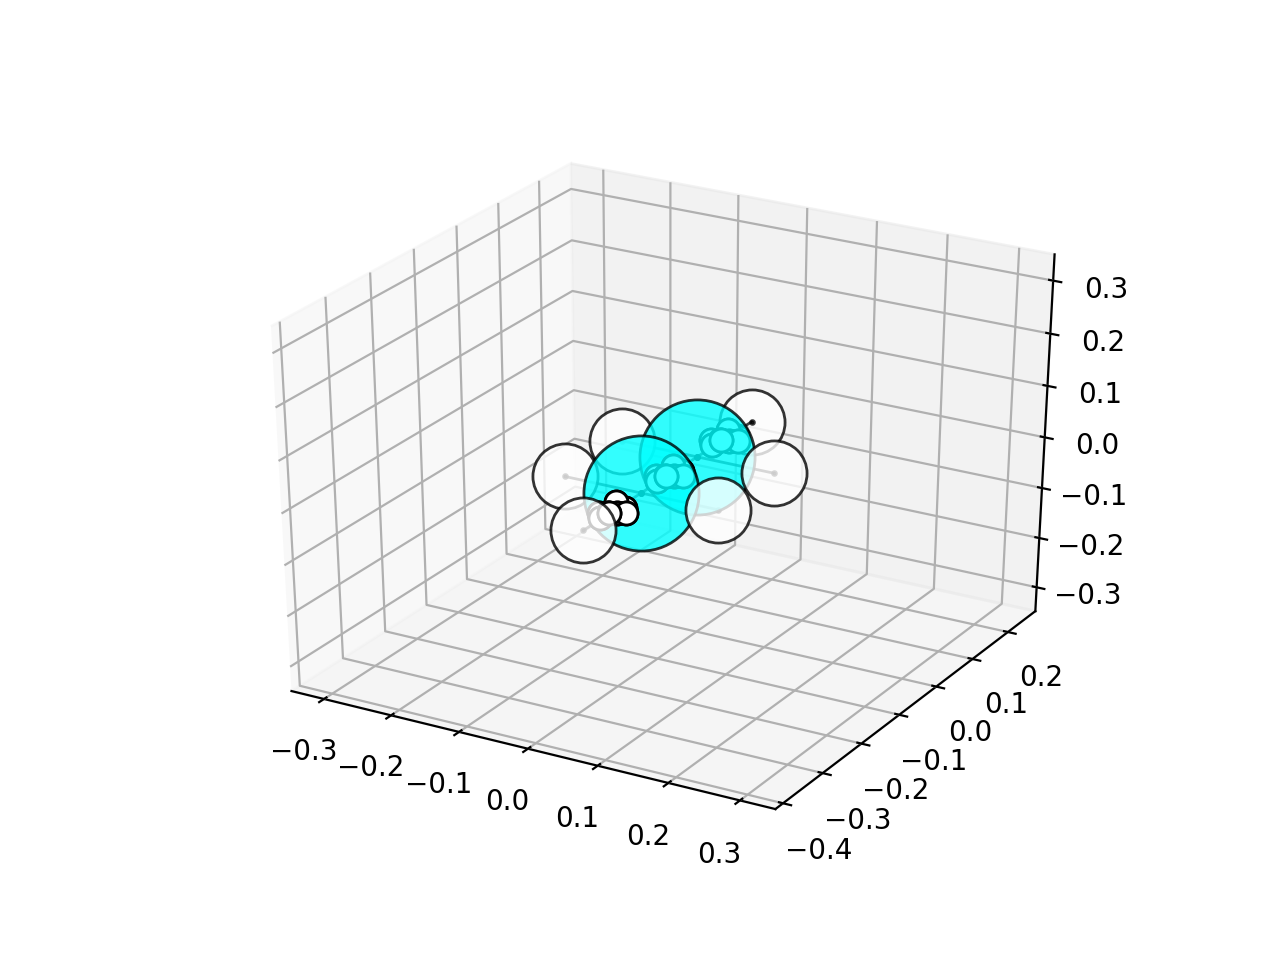

In [16]:
ethane = Alkane(chain_length=2)
visualize(ethane)

<IPython.core.display.Javascript object>


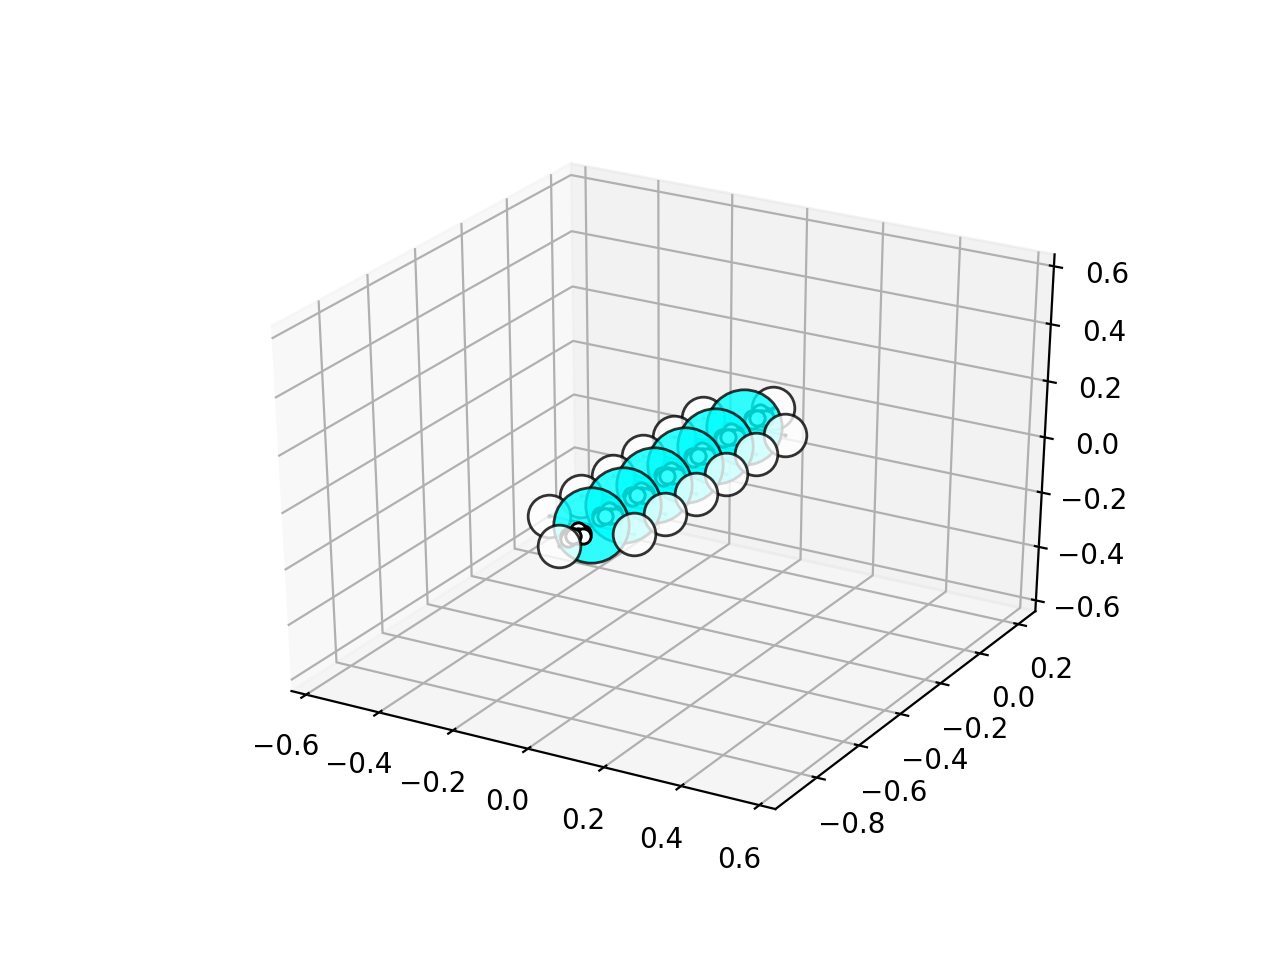

In [5]:
hexane = Alkane(chain_length=6)
visualize(hexane)

## Creation of imidazole with arbitrary side chain length

The linear alkane class above can be trivially modified to create more complex molecules, simply by changing the capping group from an hydrogen to a imidazole ring. 

Let us first start by creating a Imidazole class, loading in the structure from a mol2 file, addinga Port to the appropriate location for the tail.

In [21]:
class Imidazole(mb.Compound):
    def __init__(self):
        super(Imidazole, self).__init__()
        mb.load('cmim.mol2', compound=self)
        #define C_tail to be the N atom for which the carbon tail will attach. 
        #This is the 4th entry in the datafile provided, hence self[3]
        C_tail = self[3] 
        #add a port
        self.add(mb.Port(anchor=C_tail, orientation=[0, 1, 0], separation=0.04), 'up')

Next we will create a CMIM class that largely mimic the alkane class, but changes one capping hydrogen for an Imidazole. 

In [22]:
from mbuild.lib.atoms import H
from mbuild.lib.moieties import CH2

class CMIM(mb.Compound):
    def __init__(self, chain_length):
        super(CMIM, self).__init__()
        
        
        hydrogen = H()
        last_unit = CH2()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['up'])
        self.add(last_unit, label='ch2[$]')
        self.add(hydrogen, label='up-cap')
        for _ in range(chain_length - 1):
            current_unit = CH2()
            mb.force_overlap(move_this=current_unit,
                             from_positions=current_unit['up'],
                             to_positions=last_unit['down'])
            self.add(current_unit, label='ch2[$]')
            last_unit=current_unit
        imidazole = Imidazole()
        mb.force_overlap(move_this=imidazole,
                         from_positions=imidazole['up'],
                         to_positions=last_unit['down'])
        self.add(imidazole, label='down-cap')

Here, we can use this to create 1-Butyl-3-methylimidazolium (bmim), by passing a side chain length of 4.

/Users/cri/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:1961: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/cri/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:1963: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


<IPython.core.display.Javascript object>


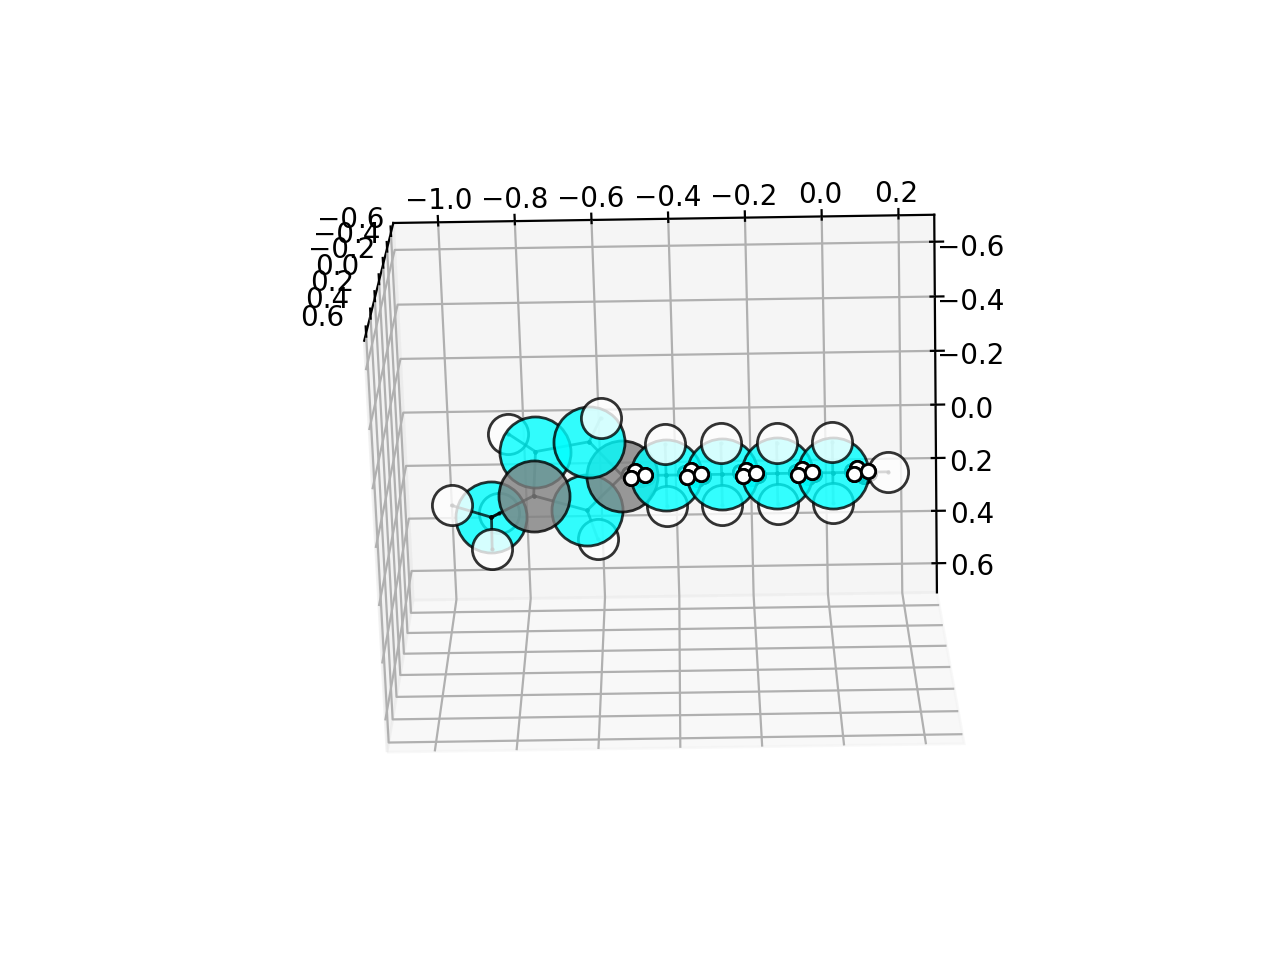

In [24]:
bmim= CMIM(chain_length=4)
visualize(bmim)